In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("/storage/home/ndh5286/Fun Projects/RF Hypothesis Testing/rf_hyp_test.csv")
data = data.iloc[:, 1:]

data['Vote16'].replace({2: 0, 3: 0}, inplace=True)

# Split Data

In [7]:
#Extract the features and target variable
X = data.drop(columns=['Vote16', 'Happy', 'Physhlth', 'Health', 'WrkGovt', 'Hrs', 'Bible'])
X2 = data.drop(columns=['Vote16', 'Happy', 'Physhlth', 'Health', 'WrkGovt', 'Hrs', 'Bible', 'Depression'])
X3 = data.drop(columns=['Vote16', 'WrkGovt', 'Hrs', 'Bible'])
y = data['Vote16']

np.random.seed(1337)

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1337)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.25, random_state=1337)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.25, random_state=1337)

In [57]:
np.random.seed(1337)

#All Measures

#Search Params
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

#Instantiate Random Forest
rf = RandomForestClassifier()

#Perform grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

#Select Best Model Found
best_model = grid_search.best_estimator_

#Create Predictions
predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("All Measures Accuracy:", accuracy)

All Measures Accuracy: 0.706984667802385


In [6]:
np.random.seed(1337)

#All Measures

#Search Params
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

#Instantiate Random Forest
rf = RandomForestClassifier()

#Perform grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(X_train2, y_train2)

#Select Best Model Found
best_model = grid_search.best_estimator_

#Create Predictions
predictions = best_model.predict(X_test2)

accuracy = accuracy_score(y_test2, predictions)
print("Without Depression Accuracy:", accuracy)

Without Depression Accuracy: 0.7086882453151618


In [8]:
np.random.seed(1337)

#All Measures

#Search Params
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

#Instantiate Random Forest
rf = RandomForestClassifier()

#Perform grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(X_train3, y_train3)

#Select Best Model Found
best_model = grid_search.best_estimator_

#Create Predictions
predictions = best_model.predict(X_test3)

accuracy = accuracy_score(y_test3, predictions)
print("All Health Measures Accuracy:", accuracy)

All Health Measures Accuracy: 0.7001703577512777


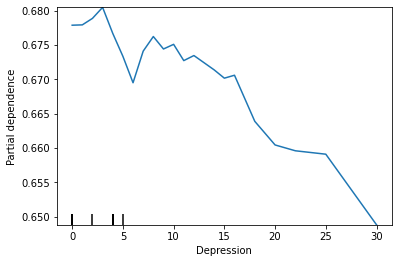

In [10]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

# Calculate and plot partial dependence for feature indices 2 and 3 (for example)
features = ['Depression']  # Select feature indices to calculate partial dependence for
fig = plot_partial_dependence(best_model, X_train3, features)

plt.show()


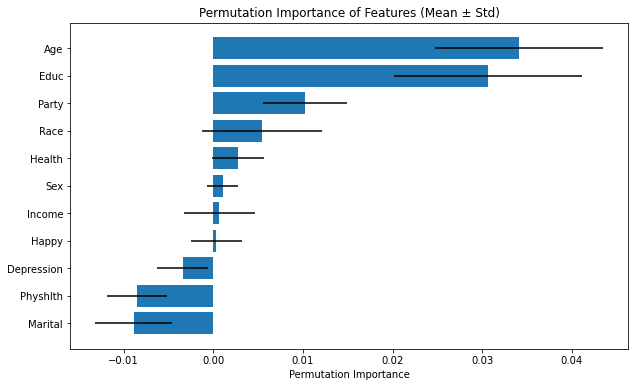

In [12]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_model, X_test3, y_test3, n_repeats=10, random_state=1337)

# Plot permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(X3.shape[1]), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx], align='center')
plt.yticks(range(X3.shape[1]), np.array(X3.columns)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features (Mean ± Std)')
plt.show()